In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader ,TensorDataset
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix


PyTorch is used for LSTM

train_test_split → no time-based splitting

MinMaxScaler → required for neural networks

In [2]:
df = pd.read_csv(r"C:\Users\gupta\OneDrive\Desktop\air quality data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['City','Date'])
#We sort for correct lag creation (even though split is random).

**ANALYZING THE DATASET**
- Size, data types, null value rate, statistical information for each column

In [3]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [6]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

###  Handle Missing Values (City-wise)

In [7]:
num_cols = df.select_dtypes(include = 'number').columns
for col in num_cols:
    df[col] = df.groupby('City')[col].transform(
        lambda x : x.interpolate().fillna(x.median())
        #Interpolation keeps trends; city median is fallback
    )

In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI               0
AQI_Bucket     4681
dtype: int64

### Now we will start our Data Exploration using Visualization EDA - Univariate analysis for each feature

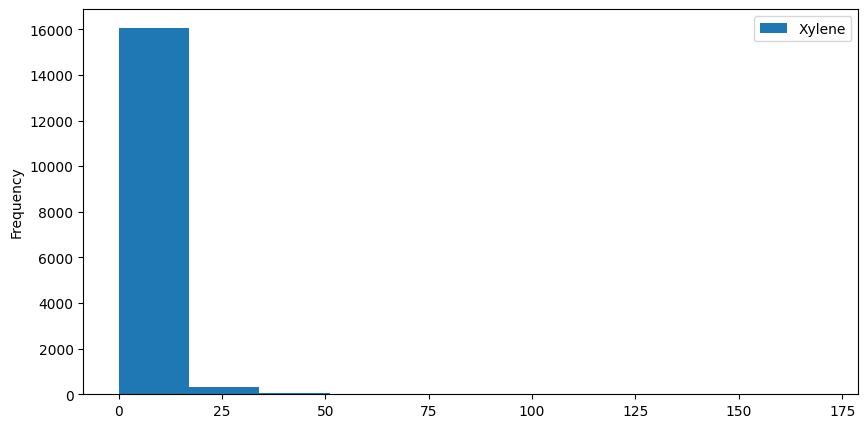

In [9]:
df['Xylene'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

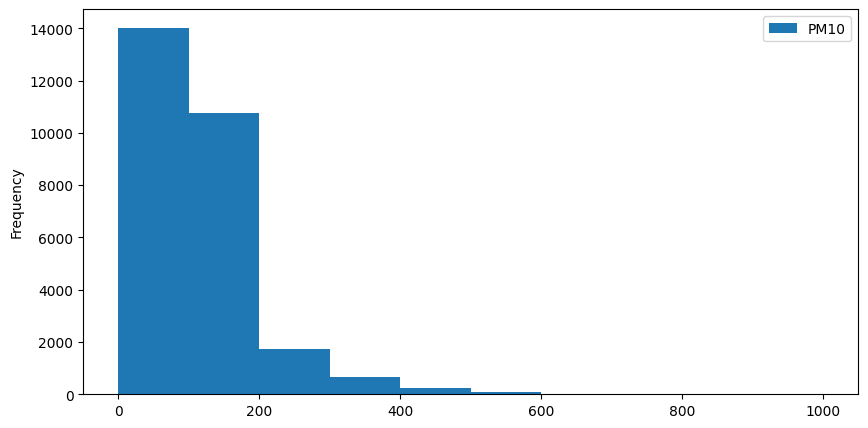

In [10]:
df['PM10'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

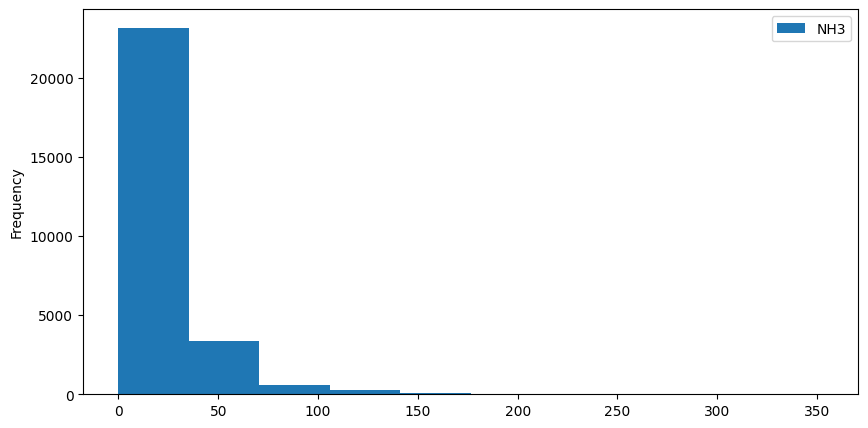

In [11]:
df['NH3'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

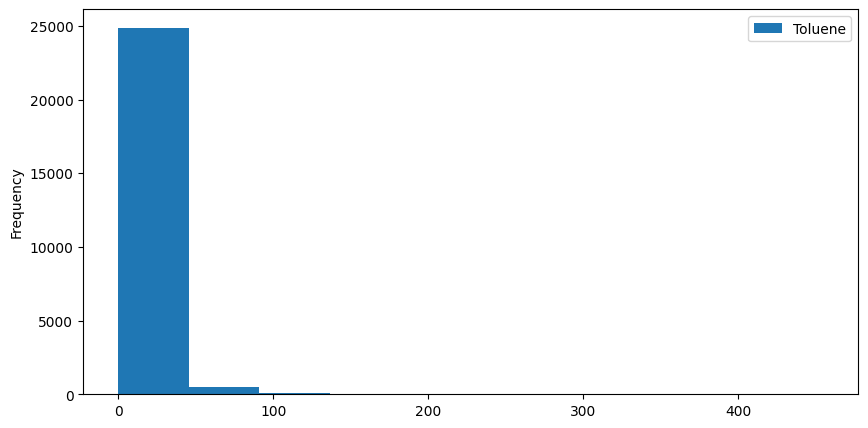

In [12]:
df['Toluene'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

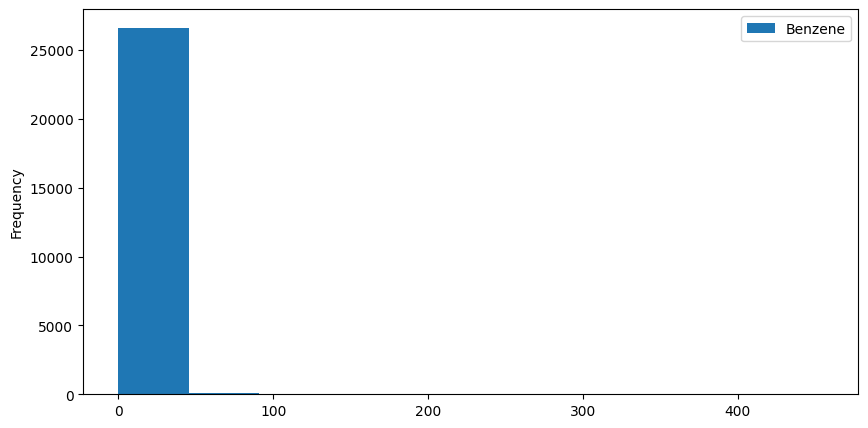

In [13]:
df['Benzene'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

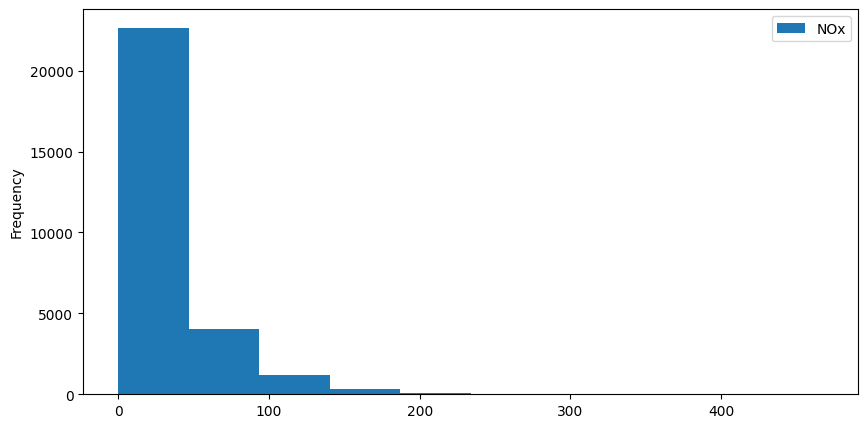

In [14]:
df['NOx'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

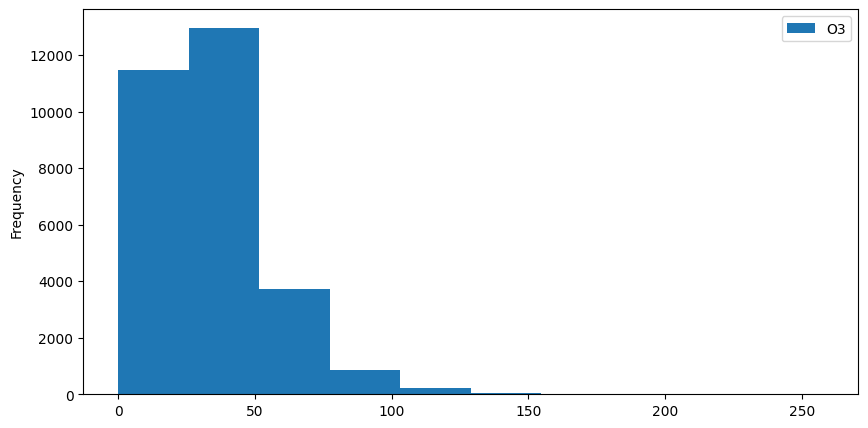

In [15]:
df['O3'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

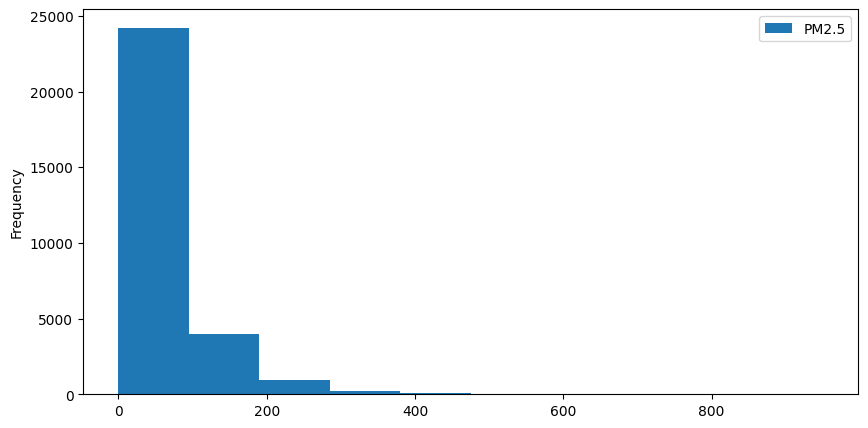

In [16]:
df['PM2.5'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

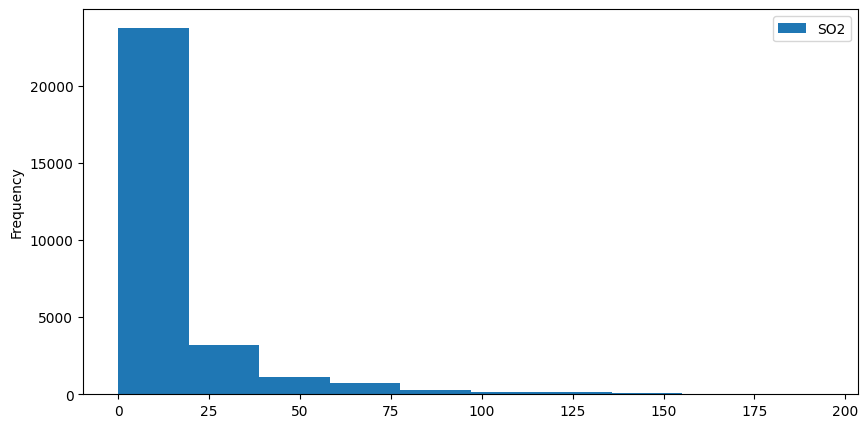

In [17]:
df['SO2'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

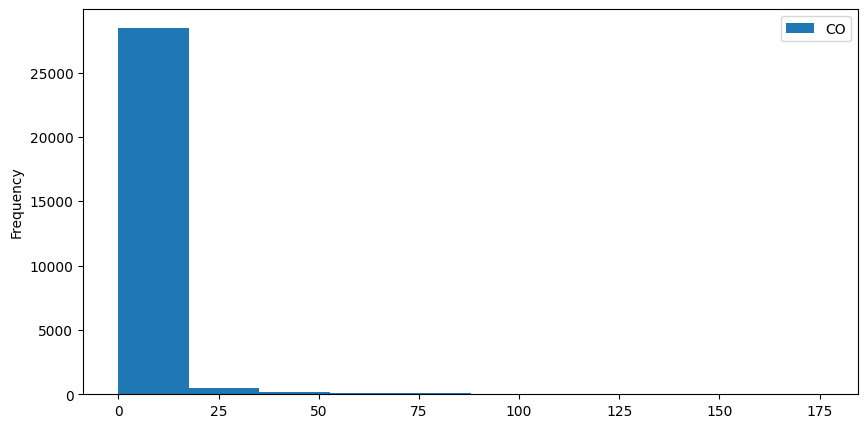

In [18]:
df['CO'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

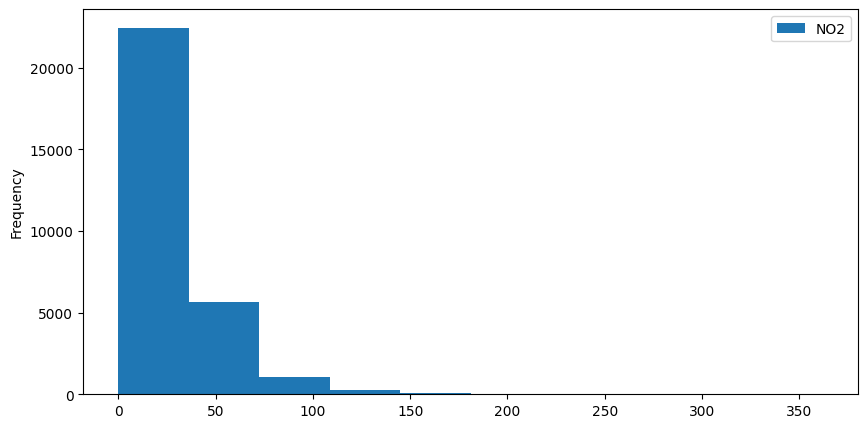

In [19]:
df['NO2'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

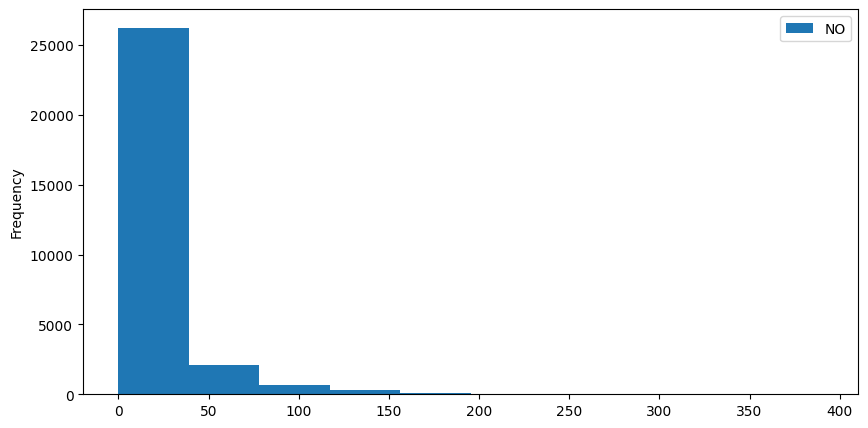

In [20]:
df['NO'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

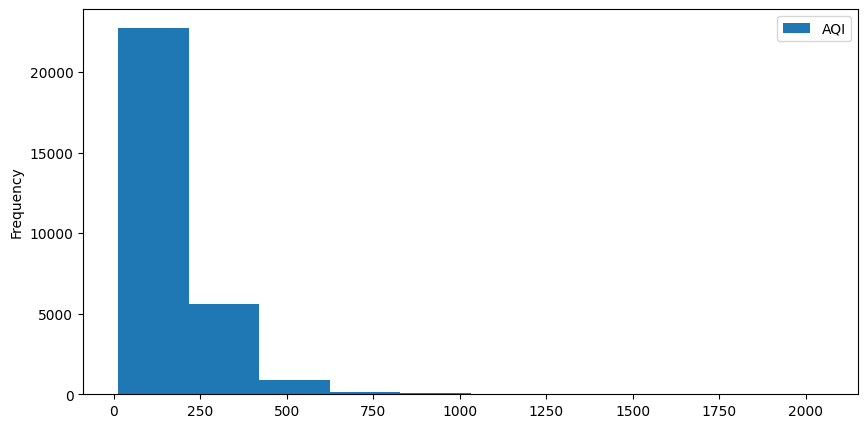

In [21]:
df['AQI'].plot(kind='hist',figsize = (10,5))
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

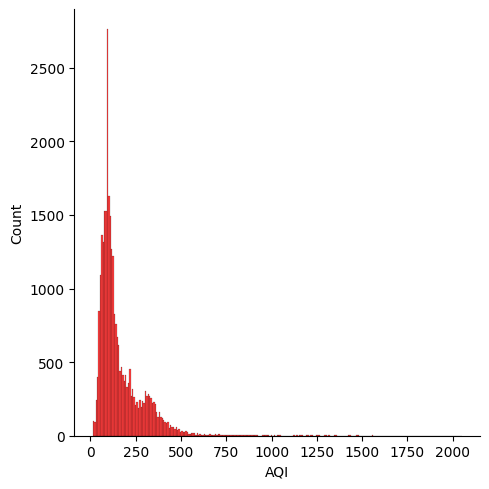

In [22]:
sn.displot(df, x='AQI',color = "red")
plt.show

### Bivariate analysis

In the below plot, we can see the frequency of the different city types present in the whole dataset.

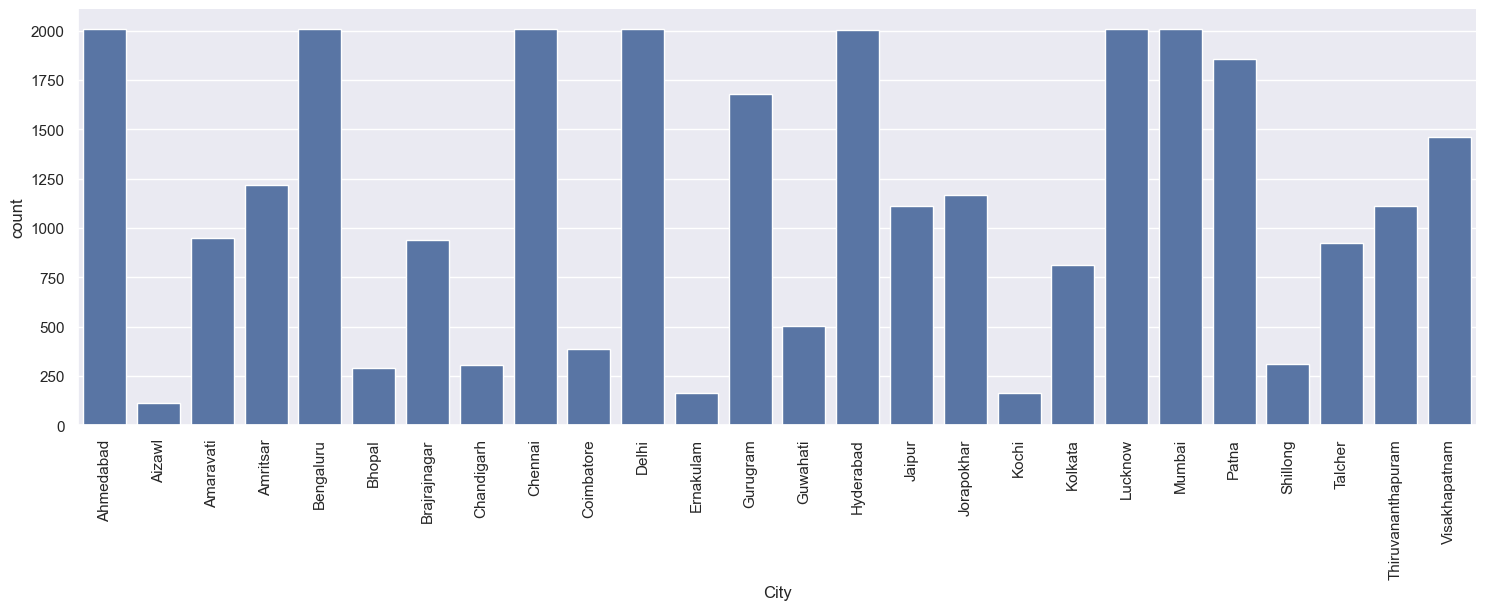

In [23]:
sn.set(style = "darkgrid")
graph = sn.catplot(x = "City",kind = "count",data = df,height= 5,aspect = 3)
graph.set_xticklabels(rotation=90)

In the below plot, we can see the frequency of all the city types for different "AQI_Bucket" variable, which are categorized as "Poor", "Very Poor", "Severe", "Moderate", "Satisfactory", "Good". It is basically so that we can get an idea of how frequency of different cities are distributed over "AQI_Bucket" variable. This will basically clear our idea about the data a bit more

In [24]:
# sn.set(style= "darkgrid")
# graph = sn.catplot(x='City',kind="count",data = df,col = "AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
# graph.set_xticklabels(rotation = 90)

In [25]:
df.isnull().sum().sort_values(ascending = False)

Xylene        13047
AQI_Bucket     4681
Toluene        4010
Benzene        2732
PM10           2009
NH3            2009
NOx            1169
O3              162
NO                0
NO2               0
Date              0
PM2.5             0
City              0
SO2               0
CO                0
AQI               0
dtype: int64

In [26]:
df.describe().loc["50%"]

Date       2018-08-05 00:00:00
PM2.5                    47.56
PM10                     97.82
NO                       10.41
NO2                      21.46
NOx                      24.21
NH3                      14.69
CO                        0.91
SO2                        9.7
O3                       29.62
Benzene                   1.09
Toluene                   2.62
Xylene                    1.04
AQI                      116.0
Name: 50%, dtype: object

In [27]:
df = df.replace({
"PM10" :{np.nan:118.454435},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})

In [28]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [29]:
df = df.drop(["AQI_Bucket"],axis=1)

### Detecting Outliers and Treatment

We drew boxplots to observe outlier data.

<Axes: >

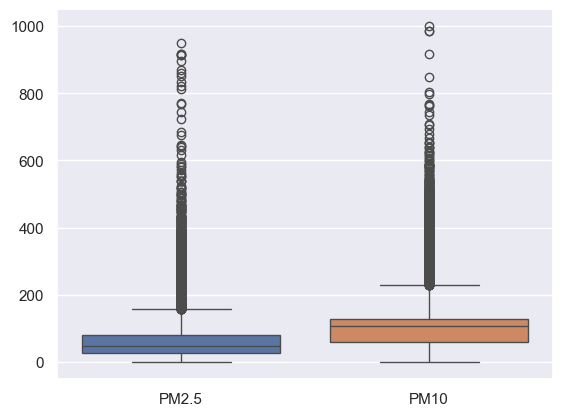

In [30]:
sn.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

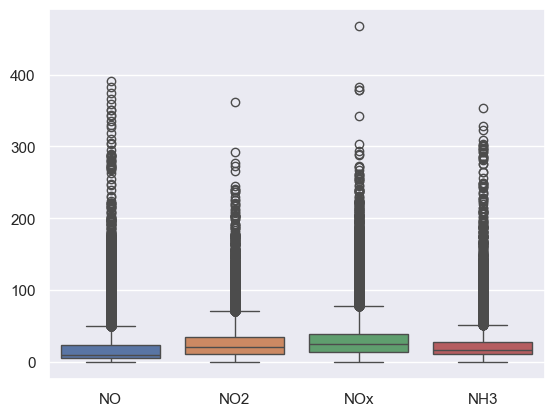

In [31]:
sn.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

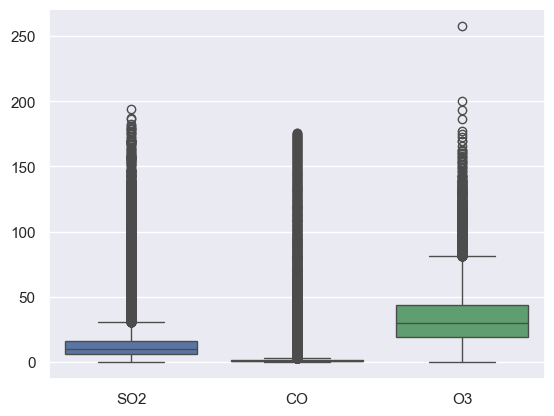

In [32]:
sn.boxplot(data=df[['SO2','CO','O3']])

<Axes: >

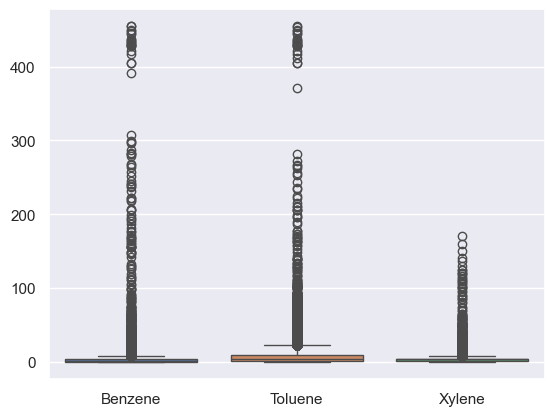

In [33]:
sn.boxplot(data=df[['Benzene','Toluene','Xylene']])

**DATA EDITING PROCEDURES**
- Procedures related to outlier data, missing data, data that has little relationship with our target column

We observed that there were too many outliers in our independent variables. We thought that the modeling we would do with this data would give us incorrect results, so we changed the outliers.

In [35]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. 
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, 
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

In [36]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,29531.0,54.208131,0.04,26.75,47.56,79.44,158.46,32.697825
PM10,29531.0,99.30075,0.01,60.795,106.09,128.565,230.2,45.909048
NO,29531.0,13.811363,0.02,5.93,10.41,23.35,49.47,10.32735
NO2,29531.0,24.204644,0.01,11.81,21.46,35.24,70.38,15.290614
NOx,29531.0,26.830242,0.0,14.07,25.27,39.54,77.73,16.824033
NH3,29531.0,19.024996,0.01,10.71,16.73,27.198205,51.93,10.898178
CO,29531.0,0.974269,0.0,0.5,0.91,1.51,3.023333,0.644044
SO2,29531.0,10.712148,0.01,5.87,9.7,15.8225,30.74,6.078497
O3,29531.0,31.96631,0.01,18.976029,29.62,43.84,81.13,16.995526


### To detect that outlier have been removed or not

<Axes: >

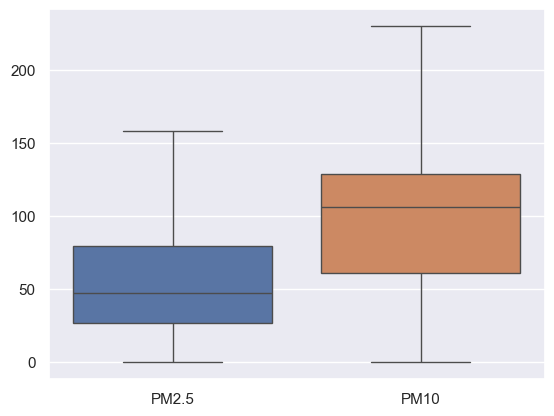

In [37]:
sn.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

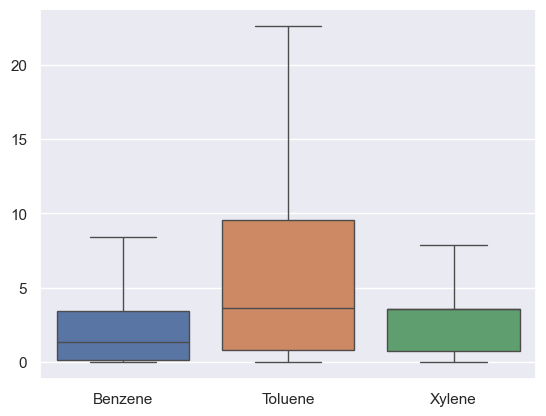

In [38]:
sn.boxplot(data=df[['Benzene','Toluene','Xylene']])

### Feature Engineering (Lag + Rolling)

In [39]:
df['AQI_lag_1'] = df.groupby('City')['AQI'].shift(1)
df['AQI_lag_7'] = df.groupby('City')['AQI'].shift(7)
df['AQI_roll_7']= (
    df.groupby('City')['AQI']
    .rolling(7)
    .mean()
    .reset_index(0,drop = True)
)

df = df.dropna()

In [40]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_lag_1,AQI_lag_7,AQI_roll_7
7,Ahmedabad,2015-01-08,58.37,107.96,23.35,36.74,39.54,23.848366,1.51,15.825,31.89,0.00,0.00,0.000000,384.5,384.5,384.5,384.5
8,Ahmedabad,2015-01-09,58.37,107.96,29.16,31.00,48.00,23.848366,1.51,15.825,25.75,0.00,0.00,0.000000,384.5,384.5,384.5,384.5
9,Ahmedabad,2015-01-10,58.37,107.96,23.35,7.04,0.00,23.848366,1.51,8.290,4.55,0.00,0.00,0.000000,384.5,384.5,384.5,384.5
10,Ahmedabad,2015-01-11,58.37,107.96,23.35,55.80,24.53,23.848366,1.51,25.030,6.79,0.00,0.00,0.000000,384.5,384.5,384.5,384.5
11,Ahmedabad,2015-01-12,58.37,107.96,23.35,40.67,39.54,23.848366,1.51,15.825,45.89,2.41,0.03,3.588683,384.5,384.5,384.5,384.5


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29349 entries, 7 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29349 non-null  object        
 1   Date        29349 non-null  datetime64[ns]
 2   PM2.5       29349 non-null  float64       
 3   PM10        29349 non-null  float64       
 4   NO          29349 non-null  float64       
 5   NO2         29349 non-null  float64       
 6   NOx         29349 non-null  float64       
 7   NH3         29349 non-null  float64       
 8   CO          29349 non-null  float64       
 9   SO2         29349 non-null  float64       
 10  O3          29349 non-null  float64       
 11  Benzene     29349 non-null  float64       
 12  Toluene     29349 non-null  float64       
 13  Xylene      29349 non-null  float64       
 14  AQI         29349 non-null  float64       
 15  AQI_lag_1   29349 non-null  float64       
 16  AQI_lag_7   29349 non-null 

In [42]:
FEATURES = [
    'PM2.5','PM10','NO','NO2','NOx','NH3',
    'CO','SO2','O3','Benzene','Toluene','Xylene'
]

TARGET = 'AQI'
SEQ_LEN = 7

In [43]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

df[FEATURES] = scaler_X.fit_transform(df[FEATURES])
df[TARGET] = scaler_y.fit_transform(df[[TARGET]])

In [44]:
# Sequence creator
# -----------------------------
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len, :-1])
        y.append(data[i+seq_len, -1])
    return np.array(X), np.array(y)

data = df[FEATURES + [TARGET]].values
X, y = create_sequences(data, SEQ_LEN)

In [45]:
# Time-based split (80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [46]:
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [47]:
class AQILSTM(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]      # ✅ last timestep
        return self.fc(out)

In [49]:
model = AQILSTM(len(FEATURES))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 20

train_losses = []
test_losses = []

for epoch in range(EPOCHS):

    # -------------------------
    # TRAIN
    # -------------------------
    model.train()
    optimizer.zero_grad()

    train_preds = model(X_train)
    train_loss = criterion(train_preds, y_train)

    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

    # -------------------------
    # TEST / EVALUATE
    # -------------------------
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss = criterion(test_preds, y_test)
        test_losses.append(test_loss.item())

        rmse = np.sqrt(mean_squared_error(
            y_test.cpu().numpy(),
            test_preds.cpu().numpy()
        ))

    # -------------------------
    # LOGGING
    # -------------------------
    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Train Loss: {train_loss.item():.4f} | "
        f"Test Loss: {test_loss.item():.4f} | "
        f"RMSE: {rmse:.3f}"
    )


Epoch 1/20 | Train Loss: 0.1811 | Test Loss: 0.1520 | RMSE: 0.390
Epoch 2/20 | Train Loss: 0.1637 | Test Loss: 0.1367 | RMSE: 0.370
Epoch 3/20 | Train Loss: 0.1469 | Test Loss: 0.1219 | RMSE: 0.349
Epoch 4/20 | Train Loss: 0.1306 | Test Loss: 0.1078 | RMSE: 0.328
Epoch 5/20 | Train Loss: 0.1150 | Test Loss: 0.0942 | RMSE: 0.307
Epoch 6/20 | Train Loss: 0.0999 | Test Loss: 0.0813 | RMSE: 0.285
Epoch 7/20 | Train Loss: 0.0857 | Test Loss: 0.0694 | RMSE: 0.263
Epoch 8/20 | Train Loss: 0.0723 | Test Loss: 0.0586 | RMSE: 0.242
Epoch 9/20 | Train Loss: 0.0602 | Test Loss: 0.0494 | RMSE: 0.222
Epoch 10/20 | Train Loss: 0.0497 | Test Loss: 0.0422 | RMSE: 0.206
Epoch 11/20 | Train Loss: 0.0415 | Test Loss: 0.0377 | RMSE: 0.194
Epoch 12/20 | Train Loss: 0.0360 | Test Loss: 0.0364 | RMSE: 0.191
Epoch 13/20 | Train Loss: 0.0340 | Test Loss: 0.0384 | RMSE: 0.196
Epoch 14/20 | Train Loss: 0.0356 | Test Loss: 0.0428 | RMSE: 0.207
Epoch 15/20 | Train Loss: 0.0398 | Test Loss: 0.0474 | RMSE: 0.218
Epoc

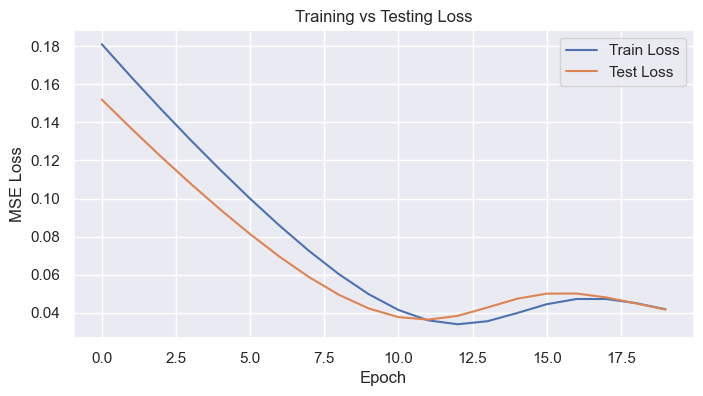

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.show()


In [52]:
# -----------------------------
# Save model & scalers
# -----------------------------
import joblib
torch.save(model.state_dict(), "lstm_aqi_model.pth")
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

['scaler_y.pkl']